In [1]:
import functions as functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

# 1. Build the Data Set Required

## 1.1 From Ken French Data Library

Extract the monthly Excess-Market, SMB, and HML returns and the one-month T-bill rate from the dataset labeled "Fama/French 3 Factors"

In [2]:
three_factors = functions.get_ffme_returns('F-F_Research_Data_Factors')
three_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2024-08,0.0161,-0.0355,-0.0113,0.0048
2024-09,0.0174,-0.0017,-0.0259,0.0040
2024-10,-0.0097,-0.0101,0.0089,0.0039


Extract the monthly RMW and CMA returns from the dataset labeled "Fama/French 5 Factors (2x3)"

In [3]:
five_factors = functions.get_ffme_returns('F-F_Research_Data_5_Factors_2x3')
five_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027
...,...,...,...,...,...,...
2024-08,0.0161,-0.0365,-0.0113,0.0085,0.0086,0.0048
2024-09,0.0174,-0.0102,-0.0259,0.0004,-0.0026,0.0040
2024-10,-0.0097,-0.0088,0.0089,-0.0138,0.0103,0.0039


Extract the monthly UMD returns from the dataset labeled "Momentum Factor (MoM)"

In [4]:
MoM = functions.get_ffme_returns('F-F_Momentum_Factor')
MoM

,Mom
Date,
1927-01,0.0036
1927-02,-0.0214
1927-03,0.0361
1927-04,0.0430
1927-05,0.0300
...,...
2024-08,0.0479
2024-09,-0.0060
2024-10,0.0287


Extract the monthly short-term reversal factor from the dataset labeled "Short-Term Reversal Factor (ST Rev)"

In [5]:
ST_Rev = functions.get_ffme_returns('F-F_ST_Reversal_Factor')
ST_Rev

,ST_Rev
Date,
1926-02,-0.0201
1926-03,-0.0590
1926-04,-0.0095
1926-05,-0.0124
1926-06,0.0401
...,...
2024-08,-0.0017
2024-09,0.0056
2024-10,-0.0138


## 1.2 From AQR Data Library

Get the updated monthly Quality-minus-Junk (QMJ) factor for the US from the AQR data library

In [6]:
QMJ = pd.read_excel('Quality Minus Junk 10 QualitySorted Portfolios Monthly.xlsx', skiprows=18,usecols="A,L",engine='openpyxl',index_col=0)
QMJ.columns = ['QMJ']
QMJ.index = pd.to_datetime(QMJ.index,format="%m/%d/%Y").to_period('M')
QMJ.dropna(inplace=True)
QMJ

,QMJ
DATE,
1957-07,0.022535
1957-08,-0.019147
1957-09,-0.000070
1957-10,0.012341
1957-11,-0.010200
...,...
2024-06,0.026932
2024-07,-0.040088
2024-08,0.039230


## 1.3 Combine all Factor Data together

In [7]:
raw_data = pd.concat([three_factors,five_factors[['RMW','CMA']],MoM,ST_Rev,QMJ],sort=False,axis=1,join='inner')
raw_data

,Mkt-RF,SMB,HML,RF,RMW,CMA,Mom,ST_Rev,QMJ
1963-07,-0.0039,-0.0045,-0.0097,0.0027,0.0068,-0.0118,0.0090,-0.0008,0.020621
1963-08,0.0507,-0.0098,0.0180,0.0025,0.0036,-0.0035,0.0101,0.0130,-0.024056
1963-09,-0.0157,-0.0033,0.0013,0.0027,-0.0071,0.0029,0.0019,0.0119,0.001689
1963-10,0.0253,-0.0058,-0.0010,0.0029,0.0280,-0.0201,0.0312,-0.0066,0.011333
1963-11,-0.0085,-0.0117,0.0175,0.0027,-0.0051,0.0224,-0.0074,0.0112,0.011044
...,...,...,...,...,...,...,...,...,...
2024-06,0.0277,-0.0306,-0.0331,0.0041,0.0051,-0.0178,0.0090,-0.0195,0.026932
2024-07,0.0124,0.0680,0.0574,0.0045,0.0022,0.0043,-0.0242,0.0347,-0.040088
2024-08,0.0161,-0.0355,-0.0113,0.0048,0.0085,0.0086,0.0479,-0.0017,0.039230
2024-09,0.0174,-0.0017,-0.0259,0.0040,0.0004,-0.0026,-0.0060,0.0056,-0.001662


# 2. Performance Summary 

Here I calculate the mean factor returns, the volatilities, the Sharpe ratio, Skewness, Kurtosis, maximum drawdown, VaR for each factor portfolio over the period for which the series is available. 

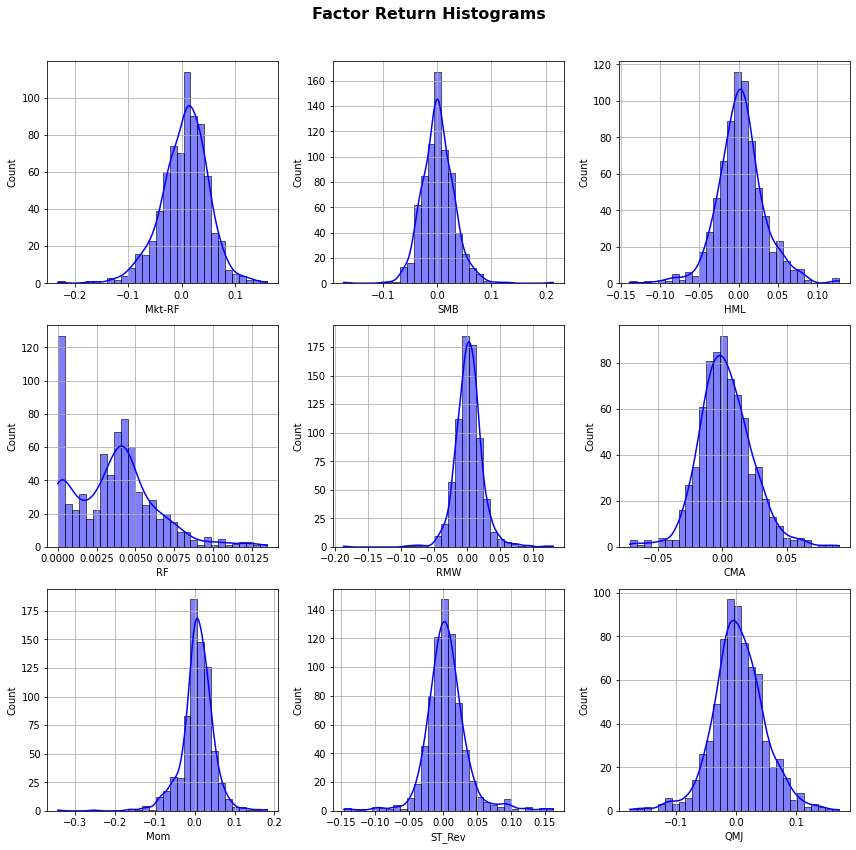

In [8]:
fig, axes = plt.subplots(3,3,figsize=(12,12))
axes = axes.flatten()

for i, col in enumerate(raw_data.columns):
    sns.histplot(raw_data[col],kde=True, bins=30, ax = axes[i],color='blue', edgecolor='black')
    axes[i].grid(True)
    
plt.tight_layout()
fig.suptitle("Factor Return Histograms",fontsize=16,fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
summary_stats = functions.summary_stats(raw_data, riskfree_rate=0)
summary_stats = summary_stats.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Historical VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary_stats = summary_stats.format(formatter="{:.3}",subset=["Sharpe Ratio","Skewness","Excess Kurtosis"])
summary_stats

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Historical VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Mkt-RF,5.9%,15.5%,-0.5,1.73,7.2%,10.1%,0.38,-55.7%
SMB,1.4%,10.6%,0.44,4.67,4.2%,5.9%,0.134,-54.8%
HML,2.9%,10.4%,0.0865,2.24,4.1%,6.3%,0.278,-58.4%
RF,4.4%,0.9%,0.655,0.719,-0.0%,-0.0%,4.87,0.0%
RMW,3.2%,7.7%,-0.276,10.9,2.8%,4.6%,0.416,-41.2%
CMA,2.9%,7.2%,0.272,1.45,2.7%,4.0%,0.407,-25.3%
Mom,6.4%,14.5%,-1.3,9.67,6.5%,10.3%,0.441,-57.6%
ST_Rev,4.9%,10.8%,0.461,5.69,3.5%,6.4%,0.452,-33.6%
QMJ,4.6%,15.3%,-0.069,1.48,6.4%,9.7%,0.297,-52.1%


I also calculate the factor return correlation and covariance matrix.

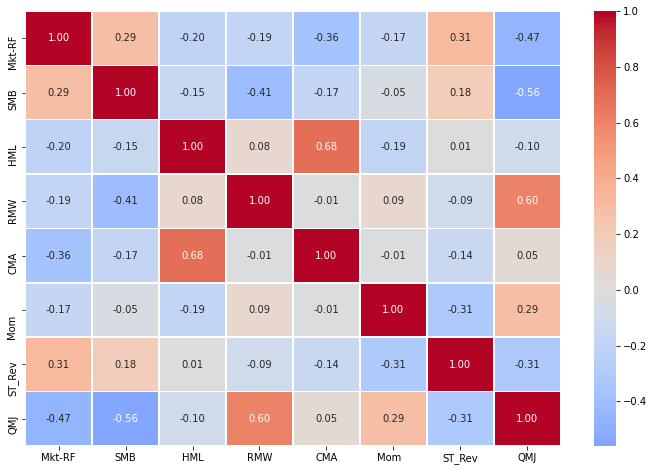

In [10]:
cor_matrix = raw_data.drop(columns=['RF']).corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(cor_matrix, annot=True, cmap='coolwarm',center=0,fmt=".2f",linewidths=0.5)
plt.show()

In [11]:
cov_matrix = raw_data.drop(columns=['RF']).cov()*12
cov_matrix

,Mkt-RF,SMB,HML,RMW,CMA,Mom,ST_Rev,QMJ
Mkt-RF,0.024067,0.004826,-0.003293,-0.002216,-0.004025,-0.003829,0.005248,-0.011118
SMB,0.004826,0.011183,-0.001640,-0.003329,-0.001300,-0.000735,0.002075,-0.009079
HML,-0.003293,-0.001640,0.010775,0.000662,0.005104,-0.002930,0.000137,-0.001522
RMW,-0.002216,-0.003329,0.000662,0.005893,-0.000080,0.000951,-0.000762,0.007116
CMA,-0.004025,-0.001300,0.005104,-0.000080,0.005153,-0.000083,-0.001099,0.000586
Mom,-0.003829,-0.000735,-0.002930,0.000951,-0.000083,0.021144,-0.004858,0.006520
ST_Rev,0.005248,0.002075,0.000137,-0.000762,-0.001099,-0.004858,0.011742,-0.005086
QMJ,-0.011118,-0.009079,-0.001522,0.007116,0.000586,0.006520,-0.005086,0.023498


In [12]:
eigenvalues = np.linalg.eigvals(cov_matrix)
eigenvalues

array([0.04516192, 0.02200828, 0.01663424, 0.01050882, 0.00887734,
       0.0054823 , 0.00312107, 0.00165965])

Following are some observations:

- All the eigenvalues of the covariance matrix is positive, this shows the covariance matrix is positive definite. 
- Momentum factor has highest annualized return.
- The most volatile factor is the excess market return.
- Correlation among Fama-French 3 factors "Mkt-RF", "SMB", "HML" are small.
- Correlation between "HML" and "CMA" is high, indicating value companies tend to be more conservative in investment spending and growth company tend to be more aggressive in investment spending.
- Correlation between "QMJ" and "RMW" is high, indicating a robus operating profitable company tends to be high quality. In fact, AQR built this high quality factor based on companies' profitability.
- Correlation between "QMJ" and "SMB" is negatively correlated becasue large booking value companies usually have a high quality.
- Correlation between "ST_Rev" and "MoM" is low, as these two factors have opposite meanings. ST_Rev is long stocks with lowest past performance, whereas Momentum factor is long stocks with highest past performance.